# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    Optimize: sma, percent band.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'ES=F'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Define Optimizations

In [4]:
# pick one
optimize_sma  = True
optimize_band = False

# define SMAs ranges
if optimize_sma:
    Xs = range(50, 525, 25)
    Xs = [str(X) for X in Xs]

# define band ranges
elif optimize_band:
    Xs = range(0, 100, 5)
    Xs = [str(X) for X in Xs]

In [5]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'sma' : 200,
    'band' : 0.0
}

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_sma:
        options['sma'] = int(X)
    elif optimize_band:
         options['band'] = int(X)/10
        
    strategies[X] = strategy.Strategy(symbol, capital, start, end, options) 
    strategies[X].run()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'expected_shortfall',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
annual_return_rate,5.26,5.24,5.68,5.85,5.41,5.79,5.98,6.06,6.08,6.01,5.90,6.20,6.14,6.16,5.82,5.60,5.52,5.42,4.94
max_closed_out_drawdown,-50.00,-46.25,-50.63,-45.24,-48.75,-44.72,-48.99,-54.54,-51.03,-41.89,-45.93,-47.76,-43.63,-42.98,-50.05,-47.60,-43.93,-43.40,-47.61
annualized_return_over_max_drawdown,0.11,0.11,0.11,0.13,0.11,0.13,0.12,0.11,0.12,0.14,0.13,0.13,0.14,0.14,0.12,0.12,0.13,0.12,0.10
drawdown_recovery_period,3719.00,1054.00,3675.00,3912.00,1268.00,535.00,1113.00,941.00,946.00,77.00,1498.00,1524.00,1460.00,1457.00,1579.00,2053.00,2444.00,2439.00,3739.00
expected_shortfall,-4.59,-4.71,-4.37,-5.35,-5.26,-6.47,-6.86,-6.18,-8.49,-7.11,-4.21,-5.10,-5.20,-4.80,-6.05,-5.75,-5.90,-5.82,-7.05
best_month,55.77,62.82,74.09,74.05,74.08,74.03,74.04,74.02,74.07,74.08,74.04,74.04,74.09,74.06,74.07,74.08,74.07,74.04,74.01
worst_month,-24.70,-29.12,-21.22,-21.22,-24.41,-29.29,-26.88,-26.63,-31.51,-24.90,-31.46,-31.45,-31.46,-31.46,-31.45,-31.46,-31.46,-31.47,-31.44
sharpe_ratio,0.58,0.57,0.60,0.61,0.57,0.61,0.63,0.64,0.65,0.64,0.63,0.65,0.65,0.64,0.61,0.59,0.59,0.58,0.53
sortino_ratio,0.60,0.59,0.63,0.64,0.60,0.64,0.65,0.67,0.69,0.67,0.64,0.67,0.67,0.67,0.63,0.61,0.61,0.60,0.55
monthly_std,3.95,3.97,3.94,3.86,3.88,3.77,3.78,3.83,3.82,3.81,3.85,3.83,3.83,3.82,3.84,3.88,3.89,3.92,4.01


Bar graphs

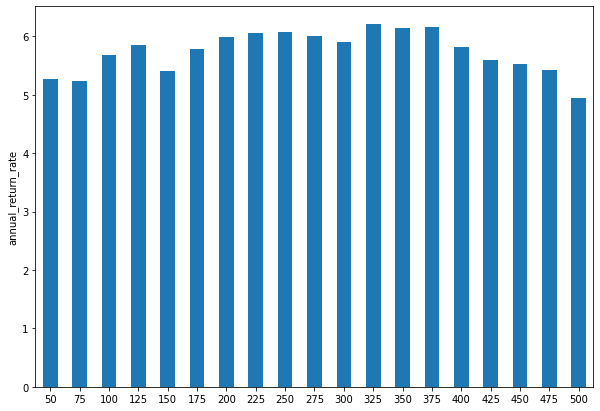

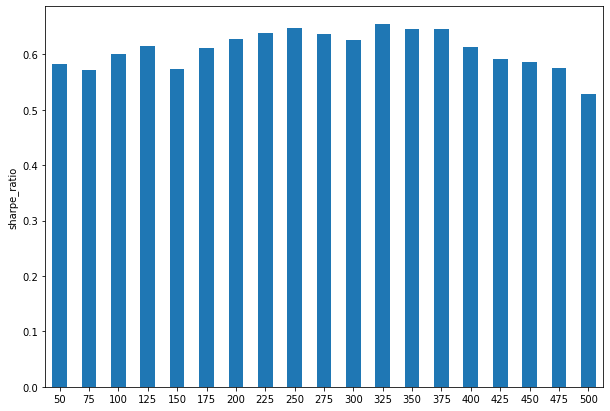

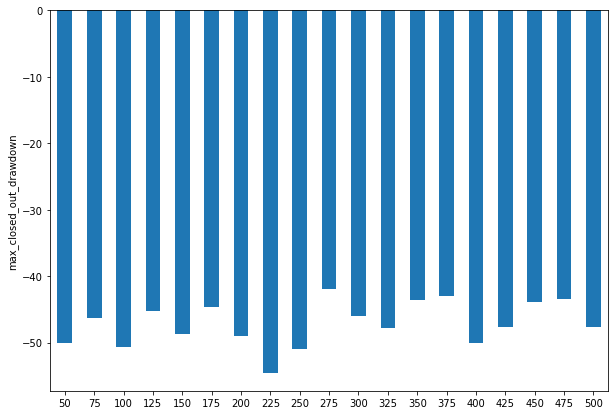

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Equity curve

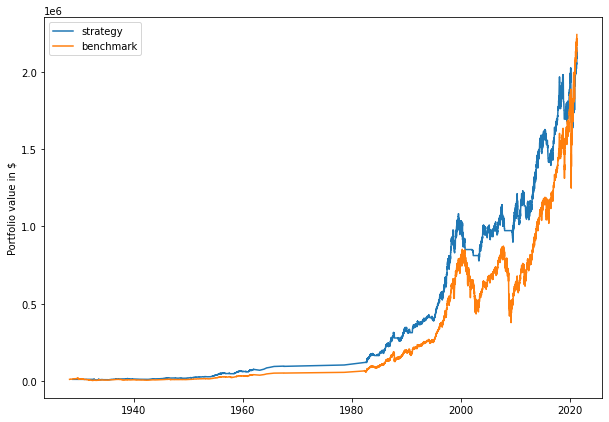

In [10]:
if optimize_sma :     Y = '200'
elif optimize_band:   Y = '30'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)